In [2]:
from google.colab import drive
drive.mount('/data')

Mounted at /data


Author:
- Hoàng Kiến Thiết 
- Võ Nhật Duy

Link download datasets: dataset url https://urbansounddataset.weebly.com/urbansound8k.html

In [3]:
!pip install librosa

# Introduction about datasets, audio files and stepsion extract data, features data 

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
filename='dog5.wav'

In [6]:
import IPython.display as ipd
import librosa
import librosa.display

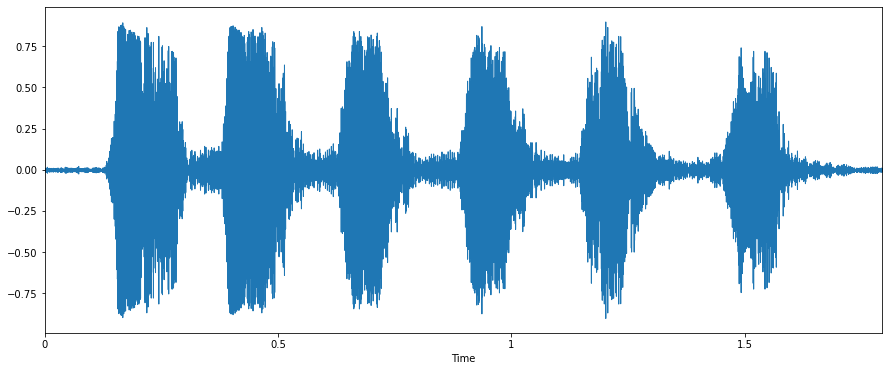

In [8]:
plt.figure(figsize=(15,6))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [78]:
import pandas as pd

df = pd.read_csv('sound.csv')
print(df.shape)
print(df.head(10))

(8732, 8)
      slice_file_name    fsID      start  ...  fold  classID             class
0    100032-3-0-0.wav  100032   0.000000  ...     5        3          dog_bark
1  100263-2-0-117.wav  100263  58.500000  ...     5        2  children_playing
2  100263-2-0-121.wav  100263  60.500000  ...     5        2  children_playing
3  100263-2-0-126.wav  100263  63.000000  ...     5        2  children_playing
4  100263-2-0-137.wav  100263  68.500000  ...     5        2  children_playing
5  100263-2-0-143.wav  100263  71.500000  ...     5        2  children_playing
6  100263-2-0-161.wav  100263  80.500000  ...     5        2  children_playing
7    100263-2-0-3.wav  100263   1.500000  ...     5        2  children_playing
8   100263-2-0-36.wav  100263  18.000000  ...     5        2  children_playing
9    100648-1-0-0.wav  100648   4.823402  ...    10        1          car_horn

[10 rows x 8 columns]


In [79]:
### Check imbalanced dataset, collect values
df['class'].value_counts()

street_music        1000
children_playing    1000
air_conditioner     1000
drilling            1000
dog_bark            1000
engine_idling       1000
jackhammer          1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [80]:
df.columns = ['f' + str(i) for i in range(0,8)]
df

,f0,f1,f2,f3,f4,f5,f6,f7
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [81]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [82]:
import numpy as np
for i in range(8):
    globals()["f" + str(i)] = np.array([encoder.fit_transform(df.loc[:,df.columns[i]].values)]).T

In [83]:
data = np.concatenate((f0,f1,f2,f3,f4,f5,f6,f7),axis =1)
print(data.shape)
print(data)

(8732, 8)
[[   0  559    0 ...    4    3    3]
 [   1  560 3496 ...    4    2    2]
 [   2  560 3516 ...    4    2    2]
 ...
 [8729  558 4536 ...    6    1    1]
 [8730  558 4549 ...    6    1    1]
 [8731  558 4772 ...    6    1    1]]


In [84]:
X = data[:,:-1]
X = np.asarray(X.astype(np.float32))
y = data[:,-1]
print(X.shape)
print(y.shape)

(8732, 7)
(8732,)


In [85]:
from collections import Counter
counter = Counter()
counter.update(y)
print(counter)

Counter({3: 1000, 2: 1000, 0: 1000, 9: 1000, 5: 1000, 7: 1000, 4: 1000, 8: 929, 1: 429, 6: 374})


In [86]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[3 2 2 ... 1 1 1]


In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(\
    X, y, test_size=0.3, random_state=42)

print('Train:')
print(X_train.shape)
print(y_train.shape)
print('Test:')
print(X_test.shape)
print(y_test.shape)

Train:
(6112, 7)
(6112,)
Test:
(2620, 7)
(2620,)


# *Model Creation*

In [24]:
import tensorflow as tf
# print(tf.__version__)

In [28]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
# # from tensorflow.keras.optimizers import Adam
# from tensorflow.keras import layers
# from tensorflow.keras import models
# from sklearn import metrics

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers , activations , models , preprocessing , utils
import tensorflow as tf
from  sklearn.model_selection import train_test_split


# RNN Model - LSTM

In [88]:
embed_dim = 128
hidden_size = 200
batch_size = 32

timesteps = X_train.shape[1]
x_dim = 1

model = models.Sequential()
model.add(layers.LSTM(hidden_size,input_shape=(timesteps,x_dim)))
model.add(layers.Dense(128,activation='sigmoid'))
model.add(layers.Dense(10,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               25728     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 188,618
Trainable params: 188,618
Non-trainable params: 0
_________________________________________________________________
None


In [89]:
print(X_train[:2])
print(X_train.shape[0])
print(X_train.shape[1])

[[5.417e+03 1.274e+03 2.146e+03 2.321e+03 0.000e+00 5.000e+00 0.000e+00]
 [7.852e+03 4.120e+02 3.130e+02 6.510e+02 0.000e+00 9.000e+00 4.000e+00]]
6112
7


In [90]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
print(y_train[:2])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [91]:
print(X_train.shape)
n_examples = X_train.shape[0]
time_steps = X_train.shape[1] 
X_train_transformed = X_train.reshape(n_examples,time_steps,1)
print(X_train_transformed.shape)
print(y_train.shape)
n_examples = y_train.shape[0]
time_steps = y_train.shape[1] 
y_train_transformed = y_train.reshape(n_examples,time_steps,1)
print(y_train_transformed.shape)

(6112, 7)
(6112, 7, 1)
(6112, 10)
(6112, 10, 1)


In [92]:
from datetime import datetime
start = datetime.now()
model.fit(X_train_transformed, y_train, batch_size = 30, epochs = 50)
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/50
204/204 [==============================] - 5s 17ms/step - loss: 1.9353 - accuracy: 0.3109
Epoch 2/50
204/204 [==============================] - 4s 17ms/step - loss: 0.8745 - accuracy: 0.8170
Epoch 3/50
204/204 [==============================] - 3s 17ms/step - loss: 0.4616 - accuracy: 0.9363
Epoch 4/50
204/204 [==============================] - 3s 17ms/step - loss: 0.2467 - accuracy: 0.9775
Epoch 5/50
204/204 [==============================] - 3s 17ms/step - loss: 0.1344 - accuracy: 0.9966
Epoch 6/50
204/204 [==============================] - 3s 17ms/step - loss: 0.0775 - accuracy: 1.0000
Epoch 7/50
204/204 [==============================] - 3s 16ms/step - loss: 0.0488 - accuracy: 1.0000
Epoch 8/50
204/204 [==============================] - 3s 16ms/step - loss: 0.0329 - accuracy: 1.0000
Epoch 9/50
204/204 [==============================] - 3s 16ms/step - loss: 0.0242 - accuracy: 1.0000
Epoch 10/50
204/204 [==============================] - 3s 17ms/step - loss: 0.0176 - accura

In [94]:
print(X_test.shape)
n_examples = X_test.shape[0]
time_steps = X_test.shape[1] 
X_test_transformed = X_test.reshape(n_examples,time_steps,1)
#
# X_test_transformed = X_test.reshape(len(X_test),time_steps,1)
X_test_transformed

(2620, 7)


array([[[6.770e+03],
        [2.850e+02],
        [3.275e+03],
        ...,
        [1.000e+00],
        [2.000e+00],
        [8.000e+00]],

       [[3.534e+03],
        [1.017e+03],
        [3.895e+03],
        ...,
        [0.000e+00],
        [3.000e+00],
        [9.000e+00]],

       [[8.556e+03],
        [5.290e+02],
        [1.524e+03],
        ...,
        [0.000e+00],
        [2.000e+00],
        [4.000e+00]],

       ...,

       [[2.943e+03],
        [9.350e+02],
        [4.014e+03],
        ...,
        [0.000e+00],
        [9.000e+00],
        [7.000e+00]],

       [[1.966e+03],
        [5.000e+01],
        [2.660e+03],
        ...,
        [0.000e+00],
        [6.000e+00],
        [7.000e+00]],

       [[4.626e+03],
        [1.154e+03],
        [3.560e+03],
        ...,
        [1.000e+00],
        [3.000e+00],
        [1.000e+00]]], dtype=float32)

In [95]:
y_pred = model.predict(X_test_transformed)
print(y_pred[:2])

[[2.7202461e-11 7.8650648e-11 4.0066794e-09 4.2472550e-08 7.1063454e-08
  1.4337043e-07 9.3601579e-07 4.2479336e-05 9.9992108e-01 3.5338024e-05]
 [2.4944296e-13 4.6896243e-13 4.9250489e-11 5.2248311e-10 1.2428545e-09
  9.0958657e-10 4.3947357e-09 1.2159849e-07 3.3882057e-05 9.9996603e-01]]


In [96]:
y_pred = y_pred.argmax(axis=1)
print(y_pred)
print(y_test)

[8 9 4 ... 7 7 1]
[8 9 4 ... 7 7 1]


In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       303
           1       1.00      1.00      1.00       122
           2       1.00      1.00      1.00       281
           3       1.00      1.00      1.00       297
           4       1.00      1.00      1.00       301
           5       1.00      1.00      1.00       290
           6       1.00      1.00      1.00       117
           7       1.00      1.00      1.00       314
           8       1.00      1.00      1.00       283
           9       1.00      1.00      1.00       312

    accuracy                           1.00      2620
   macro avg       1.00      1.00      1.00      2620
weighted avg       1.00      1.00      1.00      2620



# CNN

In [98]:
data = np.concatenate((f0,f1,f2,f3,f4,f5,f6,f7),axis =1)
print(data.shape)
print(data)

(8732, 8)
[[   0  559    0 ...    4    3    3]
 [   1  560 3496 ...    4    2    2]
 [   2  560 3516 ...    4    2    2]
 ...
 [8729  558 4536 ...    6    1    1]
 [8730  558 4549 ...    6    1    1]
 [8731  558 4772 ...    6    1    1]]


In [99]:
X = data[:,:-1]
X = np.asarray(X.astype(np.float32))
y = data[:,-1]
print(X.shape)
print(y.shape)

(8732, 7)
(8732,)


In [100]:
from collections import Counter
counter = Counter()
counter.update(y)
print(counter)

Counter({3: 1000, 2: 1000, 0: 1000, 9: 1000, 5: 1000, 7: 1000, 4: 1000, 8: 929, 1: 429, 6: 374})


In [101]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[3 2 2 ... 1 1 1]


In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train:')
print(X_train.shape)
print(y_train.shape)
print('Test:')
print(X_test.shape)
print(y_test.shape)

Train:
(6112, 7)
(6112,)
Test:
(2620, 7)
(2620,)


In [103]:
print(X_train[:2])
print(X_train.shape[0])
print(X_train.shape[1])

[[5.417e+03 1.274e+03 2.146e+03 2.321e+03 0.000e+00 5.000e+00 0.000e+00]
 [7.852e+03 4.120e+02 3.130e+02 6.510e+02 0.000e+00 9.000e+00 4.000e+00]]
6112
7


In [104]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
print(y_train[:2])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [105]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [107]:
start = datetime.now()
model.fit(X_train,y_train,epochs=50, batch_size=30)
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/50
204/204 [==============================] - 0s 1ms/step - loss: 2.1521 - accuracy: 0.1936
Epoch 2/50
204/204 [==============================] - 0s 1ms/step - loss: 2.1551 - accuracy: 0.2027
Epoch 3/50
204/204 [==============================] - 0s 1ms/step - loss: 2.1487 - accuracy: 0.2029
Epoch 4/50
204/204 [==============================] - 0s 1ms/step - loss: 2.1508 - accuracy: 0.2008
Epoch 5/50
204/204 [==============================] - 0s 1ms/step - loss: 2.1379 - accuracy: 0.2055
Epoch 6/50
204/204 [==============================] - 0s 1ms/step - loss: 2.1362 - accuracy: 0.2027
Epoch 7/50
204/204 [==============================] - 0s 1ms/step - loss: 2.1351 - accuracy: 0.2073
Epoch 8/50
204/204 [==============================] - 0s 1ms/step - loss: 2.1360 - accuracy: 0.2075
Epoch 9/50
204/204 [==============================] - 0s 1ms/step - loss: 2.1398 - accuracy: 0.1965
Epoch 10/50
204/204 [==============================] - 0s 1ms/step - loss: 2.1339 - accuracy: 0.2080

In [108]:
y_pred = model.predict(X_test)
print(y_pred[:2])

[[0.04287796 0.08966576 0.0384872  0.11561906 0.08672556 0.121903
  0.00420077 0.09504703 0.26608387 0.13938981]
 [0.13251881 0.02544213 0.10513166 0.04250403 0.11232483 0.12017999
  0.02443206 0.25012067 0.042648   0.14469786]]


In [109]:
y_pred = y_pred.argmax(axis=1)
print(y_pred)
print(y_test)

[8 7 4 ... 7 7 2]
[8 9 4 ... 7 7 1]


In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.25      0.20      0.22       303
           1       0.33      0.01      0.02       122
           2       0.19      0.07      0.10       281
           3       0.25      0.18      0.21       297
           4       0.18      0.33      0.23       301
           5       0.25      0.12      0.16       290
           6       0.37      0.35      0.36       117
           7       0.26      0.61      0.37       314
           8       0.22      0.35      0.27       283
           9       0.22      0.05      0.08       312

    accuracy                           0.23      2620
   macro avg       0.25      0.23      0.20      2620
weighted avg       0.24      0.23      0.20      2620

